#### RICHTER PREDICTION 

### Analisis de datos iniciales

In [39]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
test = pd.read_csv('Earthquake_test.csv')
test.drop(columns='building_id', inplace=True)


In [41]:


df = pd.read_csv('Earthquake_train.csv')
df.drop(columns='building_id', inplace=True)
df

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,22,1136,5551,1,20,4,2,t,r,n,...,0,0,0,0,0,0,0,0,0,2
1,25,419,11222,2,15,12,5,n,r,n,...,0,0,0,0,0,0,0,0,0,1
2,23,892,6156,3,30,8,7,o,r,q,...,0,0,0,0,0,0,0,0,0,2
3,10,1397,1591,2,15,7,6,t,r,n,...,0,0,0,0,0,0,0,0,0,3
4,27,422,10353,2,30,7,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156355,27,422,1092,3,35,12,7,t,r,n,...,0,0,0,0,0,0,0,0,0,2
156356,10,690,7305,3,30,6,7,t,r,n,...,0,0,0,0,0,0,0,0,0,3
156357,17,229,9736,3,30,4,6,t,r,n,...,0,0,0,0,0,0,0,0,0,3
156358,26,1215,10395,1,30,6,3,t,r,n,...,0,0,0,0,0,0,0,0,0,2


In [42]:
# Analisis de la variable tipo de fundacion 
foundationtype = pd.DataFrame(df['foundation_type'].value_counts())
total =df.groupby('foundation_type').value_counts().sum()
foundationtype['%'] = (foundationtype['foundation_type'] / total)*100
# ETIQUETAS DE FOUNDATION TYPE
#R = mortero de barro con ladrillo o piedra
#W = madera (bambu u otra)
#U = cemento o ladrillo
#I = concreto reforzado
#H = otros


In [43]:
features = df.columns

In [44]:
# Separar el conjunto en train en train y test
X = df.copy().drop('damage_grade', axis=1)
y = df['damage_grade']

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [46]:
#Label encoding de las columnas categoricas
# Columnas categoricas de los datos
categoricas = list(X_train.select_dtypes(['object']).columns)


In [47]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (125088, 38)
Training Labels Shape: (125088,)
Testing Features Shape: (31272, 38)
Testing Labels Shape: (31272,)


In [48]:
# Label encoding de las columnas categoricas, guardando como diccionario las variables transformadas

from sklearn.preprocessing import LabelEncoder

le_dict= {}
for col in X_train.select_dtypes(['object']):
  le = LabelEncoder()
  X_train[col] = le.fit_transform(X_train[col])
  X_test[col] = le.transform(X_test[col])
  test[col] = le.transform(test[col])
  #Save a mapping of categorical columns values and its transforamtion - needed 
  #later on for mapping purposes
  le_dict[col] = dict(zip(le.classes_, le.transform(le.classes_)))

In [49]:
geocolumns = ['geo_level_1_id', 'geo_level_2_id','geo_level_3_id']
geocolumns
X_train[geocolumns]

,geo_level_1_id,geo_level_2_id,geo_level_3_id
24098,0,1405,8581
52439,4,1334,9215
31966,10,405,5132
14001,13,526,10321
127940,25,889,11109
...,...,...,...
97639,21,111,7141
95939,8,1221,10799
152315,9,568,573
117952,6,1022,10827


In [195]:
df_driven = pd.read_csv('DrivenData_Train_Values.csv')
#Dataset de driven data para mapear con todos los valores en geo 2 y geo 3
le_dict_geo1= {}
le_dict_geo2= {}
le_dict_geo3= {}

le_g1 = LabelEncoder()
le_g2 = LabelEncoder()
le_g3 = LabelEncoder()

df_driven['geo_level_1_id'] = le_g1.fit_transform(df_driven['geo_level_1_id'])
le_dict_geo1['geo_level_1_id'] = dict(zip(le_g1.classes_, le_g1.transform(le_g1.classes_)))

df_driven['geo_level_2_id'] = le_g2.fit_transform(df_driven['geo_level_2_id'])
le_dict_geo2['geo_level_2_id'] = dict(zip(le_g2.classes_, le_g2.transform(le_g2.classes_)))

df_driven['geo_level_3_id'] = le_g3.fit_transform(df_driven['geo_level_3_id'])
le_dict_geo3['geo_level_3_id'] = dict(zip(le_g3.classes_, le_g3.transform(le_g3.classes_)))

In [196]:
le_dict_geo2.keys()

dict_keys(['geo_level_2_id'])

In [52]:


X_train['geo_level_1_id'] = le_g1.transform(X_train['geo_level_1_id'])
#le_dict_geo['geo_level_1_id'] = dict(zip(le_g.classes_, le_g.transform(le_g.classes_)))

X_train['geo_level_2_id'] = le_g2.transform(X_train['geo_level_2_id'])
#le_dict_geo['geo_level_2_id'] = dict(zip(le_g.classes_, le_g.transform(le_g.classes_)))

X_train['geo_level_3_id'] = le_g3.transform(X_train['geo_level_3_id'])
#le_dict_geo['geo_level_3_id'] = dict(zip(le_g.classes_, le_g.transform(le_g.classes_)))



In [53]:

X_test['geo_level_1_id'] = le_g1.transform(X_test['geo_level_1_id'])
#le_dict_geo['geo_level_1_id'] = dict(zip(le_g.classes_, le_g.transform(le_g.classes_)))

X_test['geo_level_2_id'] = le_g2.transform(X_test['geo_level_2_id'])
#le_dict_geo['geo_level_2_id'] = dict(zip(le_g.classes_, le_g.transform(le_g.classes_)))

X_test['geo_level_3_id'] = le_g3.transform(X_test['geo_level_3_id'])
#le_dict_geo['geo_level_3_id'] = dict(zip(le_g.classes_, le_g.transform(le_g.classes_)))


In [54]:

test['geo_level_1_id'] = le_g1.transform(test['geo_level_1_id'])
#le_dict_geo['geo_level_1_id'] = dict(zip(le_g.classes_, le_g.transform(le_g.classes_)))

test['geo_level_2_id'] = le_g2.transform(test['geo_level_2_id'])
#le_dict_geo['geo_level_2_id'] = dict(zip(le_g.classes_, le_g.transform(le_g.classes_)))

test['geo_level_3_id'] = le_g3.transform(test['geo_level_3_id'])
#le_dict_geo['geo_level_3_id'] = dict(zip(le_g.classes_, le_g.transform(le_g.classes_)))

In [55]:
#sns.pairplot(X_train)


## Analisis inicial de datos

<AxesSubplot: title={'center': 'Numero de edificios en cada clase, datos en test'}, xlabel='damage_grade'>

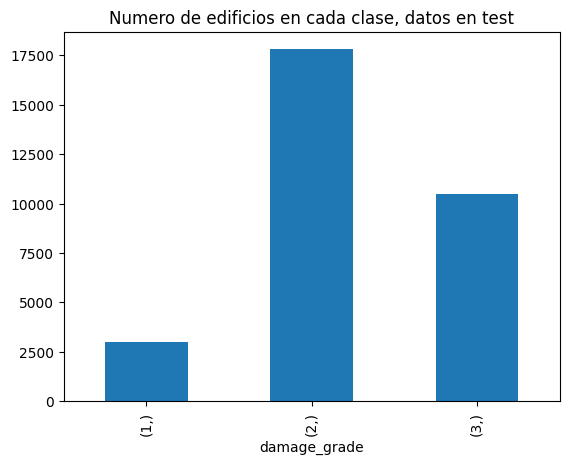

In [37]:
distest = pd.DataFrame(y_test)
(distest
             .value_counts()
             .sort_index()
             .plot.bar(title="Numero de edificios en cada clase, datos en test"))

<AxesSubplot: title={'center': 'Numero de edificios en cada clase, datos en train'}, xlabel='damage_grade'>

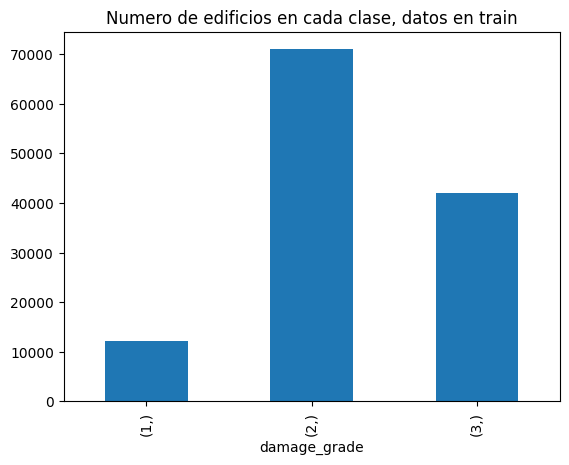

In [38]:
distrain = pd.DataFrame(y_train)
(distrain
             .value_counts()
             .sort_index()
             .plot.bar(title="Numero de edificios en cada clase, datos en train"))

/var/folders/lk/55jnxxf95rqfv_vym43yzm9h0000gn/T/ipykernel_41746/4014263342.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


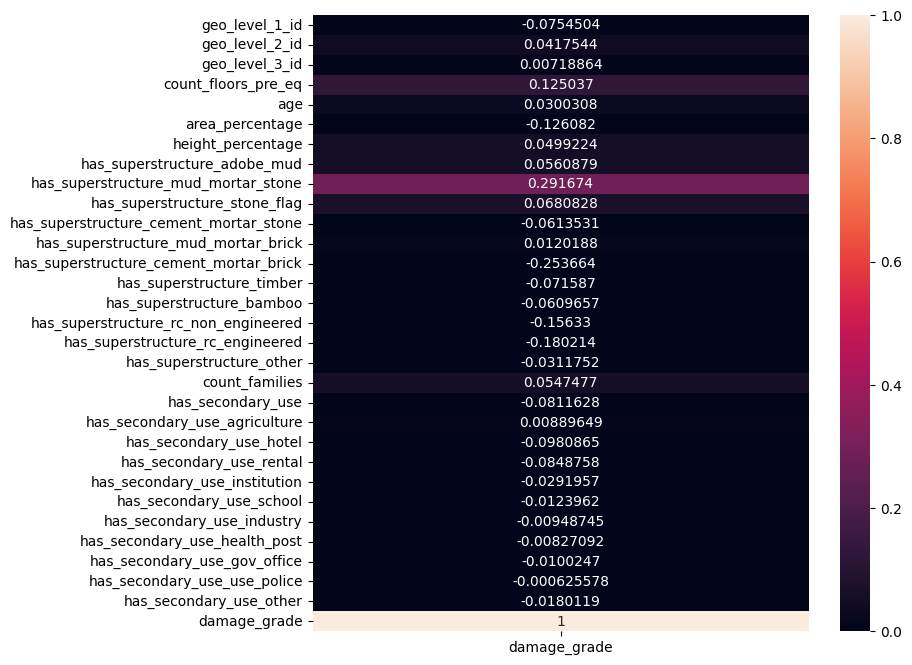

In [19]:
# Mapas de correlacion
corrMatrix = df.corr()

df2 = pd.DataFrame(corrMatrix['damage_grade'],
              index=corrMatrix.index)
fig = plt.figure(figsize=(8, 8))

sns.heatmap(df2, annot=True, fmt="g", vmin = 0, vmax= 1)
plt.savefig('correlationma.png')
plt.show()

/var/folders/lk/55jnxxf95rqfv_vym43yzm9h0000gn/T/ipykernel_41746/2835058218.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=False, fmt=".2f", vmin = -1, vmax= 1)


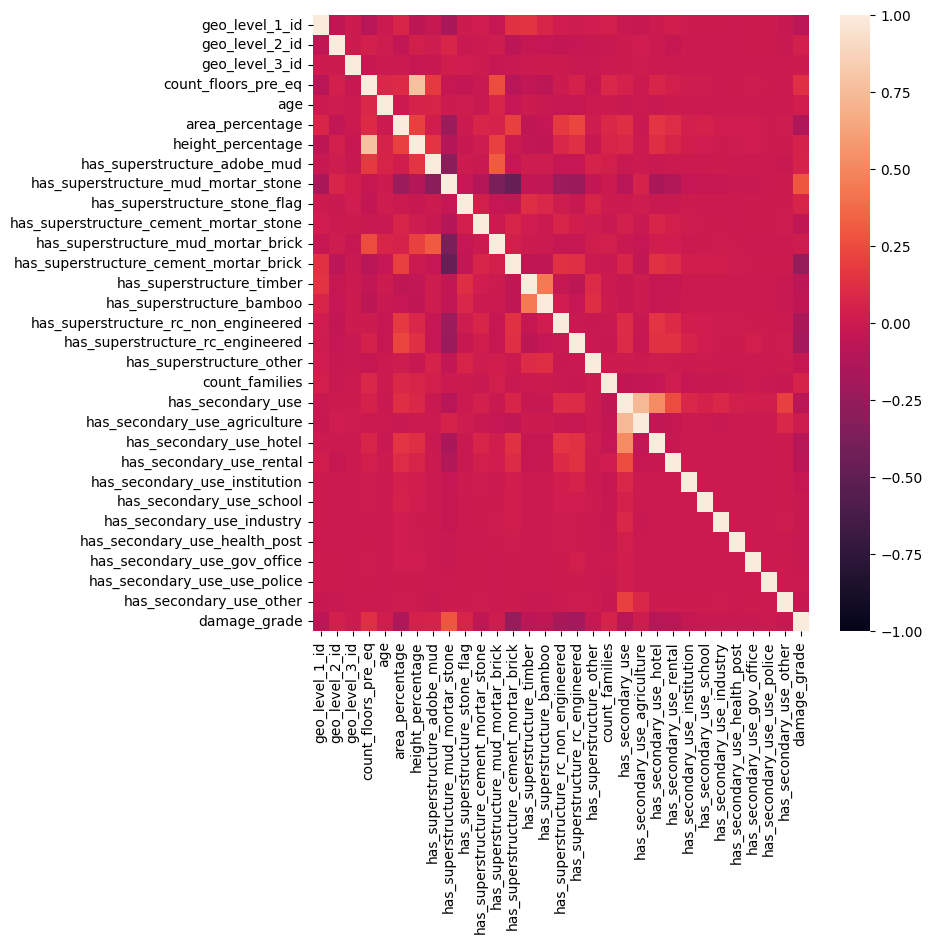

In [20]:


fig = plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=False, fmt=".2f", vmin = -1, vmax= 1)

plt.savefig('correlationdf.png')
plt.show()
plt.show()

## Modelos Iniciales Exploratorios

### Extra Trees Classifier

In [57]:
from sklearn.ensemble import ExtraTreesClassifier

modelet = ExtraTreesClassifier(n_estimators=500)
modelet.fit(X_train, y_train)


ExtraTreesClassifier(n_estimators=500)

In [58]:
y_pred_et = modelet.predict(X_test)

In [103]:
#Usamos accuracy para ver  el radio de predicciones correctas/ predicciones totales 
#Usamos F1 score ya que toma en cuenta cuanto se equivoca el model en cada clase

#Definir funciones

def metrics(x,y):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    acc = accuracy_score(x,y)
    f1 = f1_score(x,y,average=None)
    f1av = np.mean( f1_score(x,y,average=None))
    #MATRIZ DE CONFUSION
    from sklearn.metrics import ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay.from_predictions(x, y)
    disp.ax_.set_title("Confusion Matrix from Predictions")
    return print(f'Accuracy score: {acc} \nF1 Score: {f1}\nMean F1: {f1av}'), plt.show()

def graph_feat(model,X):
    feat_impor = pd.DataFrame(model.feature_importances_)
    fimport = feat_impor.set_axis(X.columns, axis='index')
    fimport.sort_values(by=[0], ascending= False, inplace = True)
    fig = plt.figure(figsize=(12, 8))
    plt.barh(fimport.index, fimport[0])
    plt.xlabel('Feature Importances')
    plt.xticks(rotation = 90)
    plt.ylabel('Feature Labels')
    plt.title('Comparacion de la importancia de las variables')
    return plt.show()


Accuracy score: 0.696437707853671 
F1 Score: [0.51432881 0.75416953 0.63402856]
Mean F1: 0.634175635222994


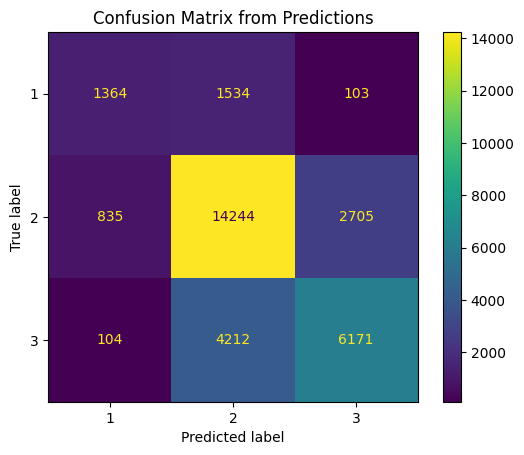

(None, None)

In [102]:
metrics(y_test, y_pred_et)

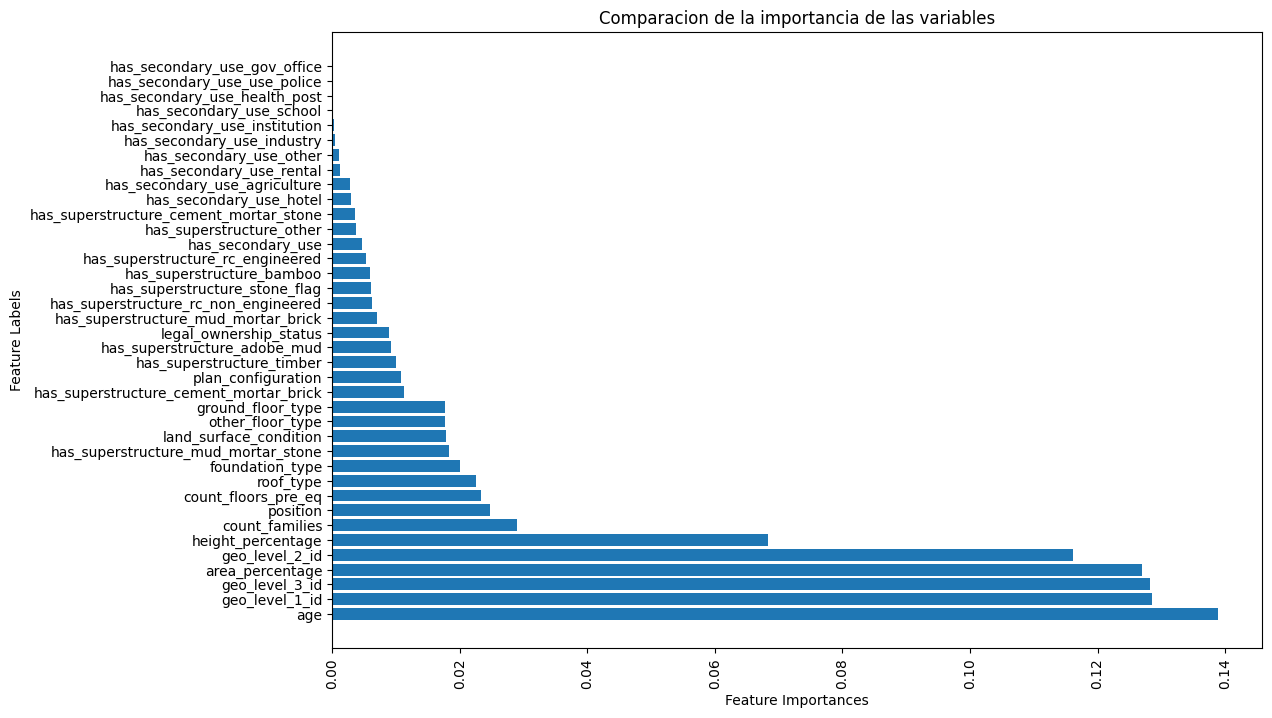

In [104]:
graph_feat(modelet, X_train)

## Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 600, random_state = 42, max_depth=30, min_samples_leaf=2, bootstrap= True, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=2, n_estimators=600,
                       n_jobs=-1, random_state=42)

In [105]:
y_pred_rf = rf.predict(X_test) 

Accuracy score: 0.7228511128165771 
F1 Score: [0.51681196 0.78349632 0.64454294]
Mean F1: 0.648283737216592


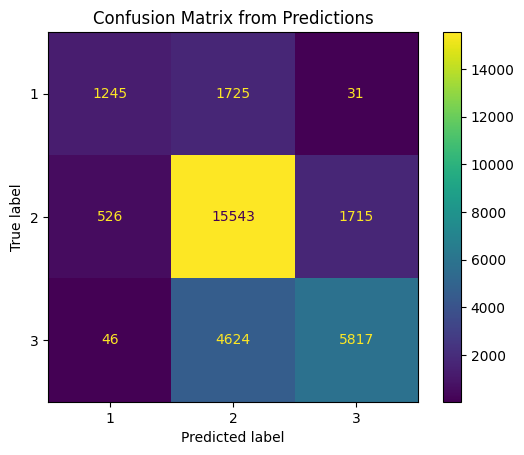

(None, None)

In [106]:
metrics(y_test, y_pred_rf)

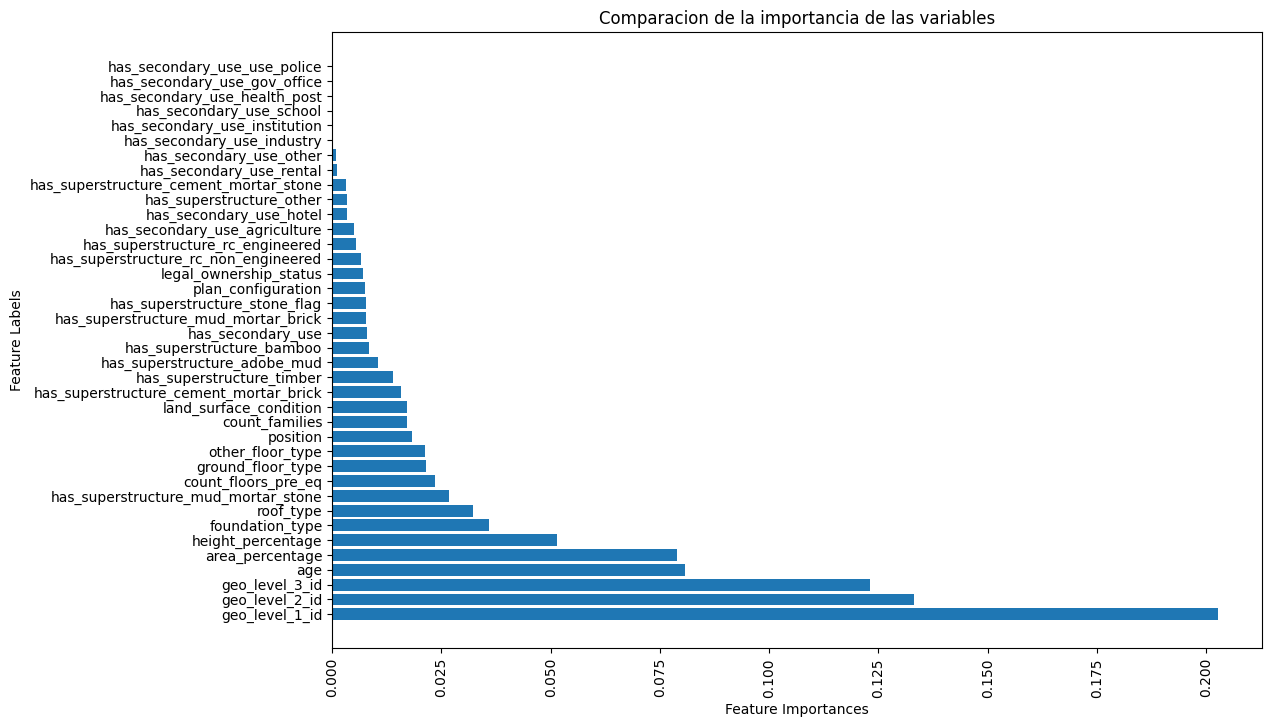

In [107]:
graph_feat(rf,X_train)

In [135]:
def crossv(model, x, y):
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(model, x, y, scoring="f1_micro", cv=3, n_jobs=-1, verbose=2)
    mean_score = scores.mean()
    return print(f'F1 scores: {scores}\nF1 micro mean: {mean_score}')



In [130]:
crossv(rf,X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END .................................................... total time=  53.1s
[CV] END .................................................... total time=  53.1s
[CV] END .................................................... total time=  53.1s
F1 scores: [0.713066   0.71167498 0.71496067]
F1 micro mean: 0.7132338833461244


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.9s finished


In [ ]:
predict_comp = rf.predict(test)
testindex = pd.read_csv('Earthquake_test.csv')
testindex = pd.DataFrame(testindex['building_id'])
prediccion = pd.DataFrame(predict_comp)
submission = pd.concat([testindex, prediccion,], axis=1)

In [ ]:
submission.set_index('building_id', inplace=True)
submission.rename(columns={0:'damage_grade'}, inplace=True)


In [ ]:
submission.to_csv('submission201222.csv')

In [226]:
columnas = list(X_train.columns)


## XGBboost

In [136]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=500, max_depth=15, learning_rate=0.1,random_state=42, verbosity=2)
xgb.fit(X_train, y_train)
   

[21:58:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 5042 extra nodes, 0 pruned nodes, max_depth=15
[21:58:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8004 extra nodes, 0 pruned nodes, max_depth=15
[21:58:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 7498 extra nodes, 0 pruned nodes, max_depth=15
[21:58:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4894 extra nodes, 0 pruned nodes, max_depth=15
[21:58:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8024 extra nodes, 0 pruned nodes, max_depth=15
[21:58:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 7460 extra nodes, 0 pruned nodes, max_depth=15
[21:58:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4984 extra nodes, 0 pruned nodes, max_depth=15
[21:58:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8190 extra nodes, 0 pruned nodes, max_depth=15
[21:58:56] INFO: src/tree/update

XGBClassifier(max_depth=15, n_estimators=500, objective='multi:softprob',
              random_state=42, verbosity=2)

In [137]:
y_predxg = xgb.predict(X_test)

Accuracy score: 0.7262727040163725 
F1 Score: [0.55854845 0.77545134 0.67844487]
Mean F1: 0.670814886676914


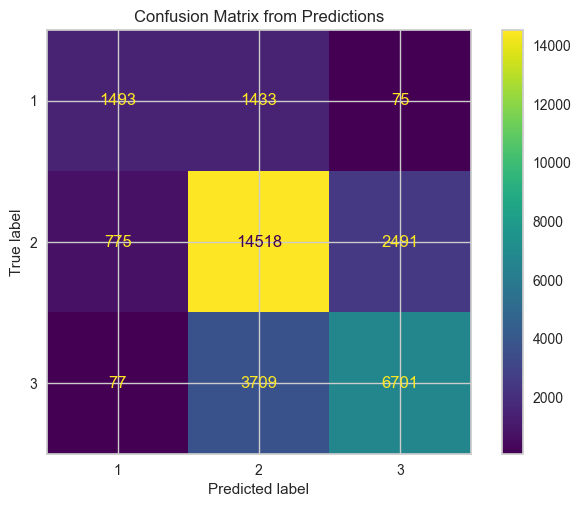

(None, None)

In [138]:
metrics(y_test, y_predxg)

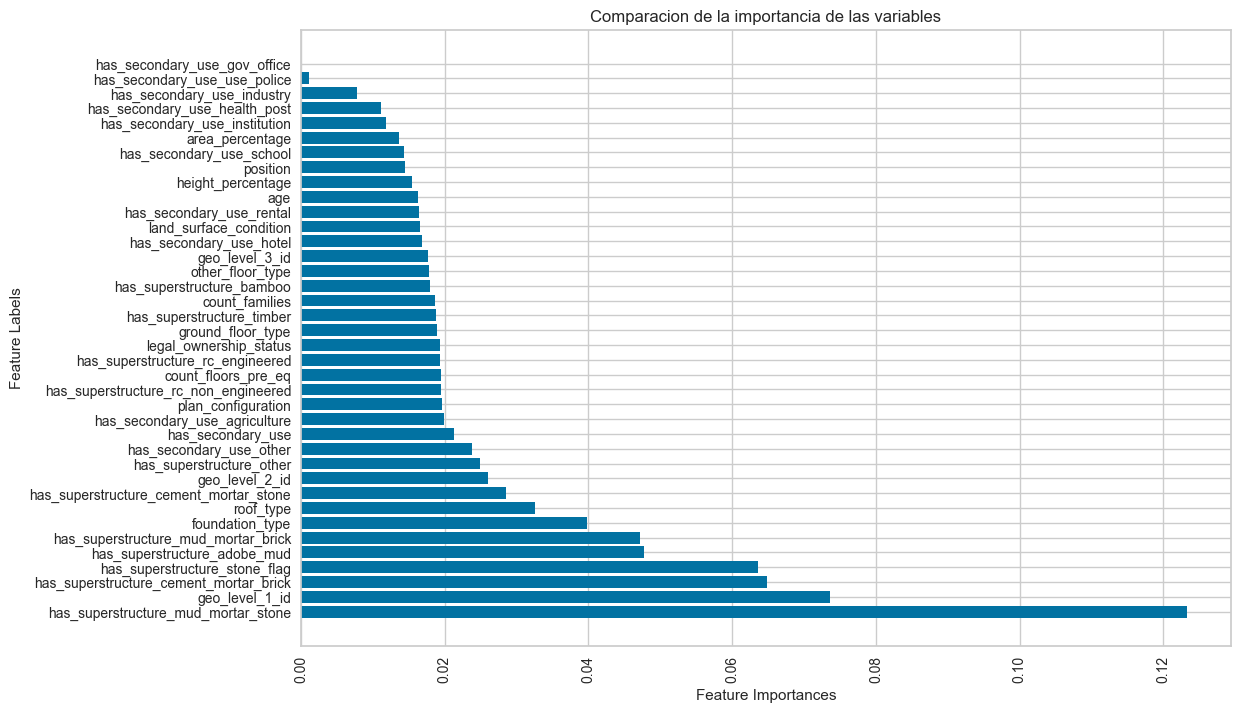

In [139]:
graph_feat(xgb,X_train)

### KNeighbors

In [131]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, weights='distance')

In [132]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.69


In [133]:
y_predk = knn.predict(X_test)

Accuracy score: 0.6886352008186237 
F1 Score: [0.50092285 0.74436213 0.63821656]
Mean F1: 0.6278338470735657


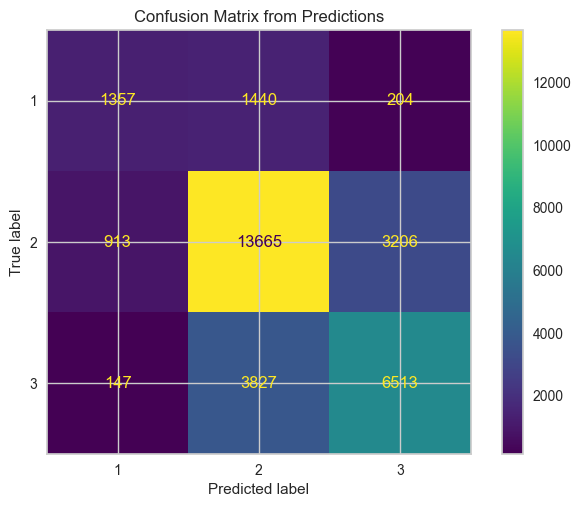

(None, None)

In [134]:
metrics(y_test, y_predk)

## Categorical Embedding

In [143]:
df['geo_level_3_id'].nunique()

11035

In [144]:
from keras.models import Sequential,Model
from keras.models import Model as KerasModel
from keras.layers import Input, Dense, Activation, Reshape
from keras.layers import Concatenate, Dropout
from keras.layers import Embedding
from keras.callbacks import ModelCheckpoint
from keras.utils import plot_model
import keras

2022-12-21 22:35:43.110722: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Geo Layer 1

In [183]:

column =['geo_level_1_id']
input_train_list2 = []
input_test_list2 = []
for c in column:
  input_train_list2.append(X_train[c].values)
  input_test_list2.append(X_test[c].values)
  
print(np.unique(input_train_list2))
print(np.unique(input_test_list2))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]


In [148]:
from keras.layers import Input
# input models will capture all the input list
input_models_geo1=[]

# output embeddings will capture all the output embeddings
output_embeddings_geo1=[]

for c in column:
  cat_emb_name= c+'_Embedding'
  #Identifying the number of unique values in the category
  no_of_unique_cat  = X_train[c].nunique()
  print(X_train[c].unique())
  embedding_size = 16
  input_model = Input(shape=(1,),name = c+'_Input')
  output_model = Embedding(no_of_unique_cat, embedding_size,name=cat_emb_name)(input_model)
  output_model = Reshape(target_shape=(embedding_size,))(output_model)   

  input_models_geo1.append(input_model)
  output_embeddings_geo1.append(output_model) 

output = Concatenate()(output_embeddings_geo1)
output = Dense(128)(output)
output = Activation('relu')(output)
#output= Dropout(0.2)(output)
output = Dense(256)(output)
output = Activation('relu')(output)
#output= Dropout(0.3)(output)
output = Dense(4, activation='softmax')(output)

model_geo1 = Model(inputs=input_models_geo1, outputs=output)
model_geo1.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=['sparse_categorical_accuracy'])

model_geo1.summary()

[ 0  4 10 13 25  6 27  1 17 14  3  7 20 16 12  5 30 21  8 26 22 11  2  9
 15 19 18 23 24 29 28]


2022-12-21 22:35:56.633826: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [151]:
history2  =  model_geo1.fit(input_train_list2, y_train, validation_split=.2 , epochs =  76 , batch_size = 128)

Epoch 1/76


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


782/782 [==============================] - 3s 3ms/step - loss: 0.8088 - sparse_categorical_accuracy: 0.6358 - val_loss: 0.7832 - val_sparse_categorical_accuracy: 0.6423
Epoch 2/76
782/782 [==============================] - 2s 2ms/step - loss: 0.7878 - sparse_categorical_accuracy: 0.6403 - val_loss: 0.7835 - val_sparse_categorical_accuracy: 0.6423
Epoch 3/76
782/782 [==============================] - 2s 2ms/step - loss: 0.7872 - sparse_categorical_accuracy: 0.6411 - val_loss: 0.7829 - val_sparse_categorical_accuracy: 0.6423
Epoch 4/76
782/782 [==============================] - 2s 2ms/step - loss: 0.7873 - sparse_categorical_accuracy: 0.6405 - val_loss: 0.7844 - val_sparse_categorical_accuracy: 0.6423
Epoch 5/76
782/782 [==============================] - 2s 2ms/step - loss: 0.7867 - sparse_categorical_accuracy: 0.6411 - val_loss: 0.7818 - val_sparse_categorical_accuracy: 0.6423
Epoch 6/76
782/782 [==============================] - 2s 2ms/step - loss: 0.7865 - sparse_categorical_accuracy:

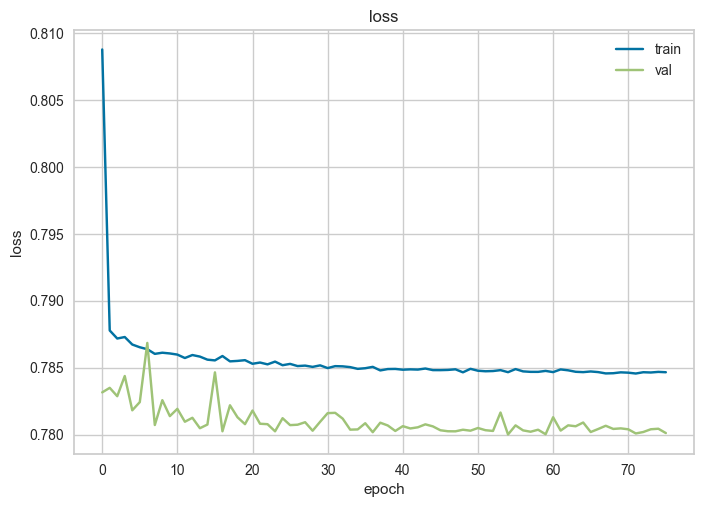

In [152]:
# summarize history for accuracy
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [159]:

model_geo1.get_layer('geo_level_1_id_Embedding').get_weights()[0]
# Below are the learned embedding for each unique category in the workclass columns
model_geo1.get_layer('geo_level_1_id_Embedding').get_weights()[0].shape
# The shape is (7,10) meaning 7 unique values each described by 10 values 
# (embedding size)

(31, 16)

In [163]:
# Extract embedding based on the label encoding
geo1_embeddings = {idx:model_geo1.get_layer('geo_level_1_id_Embedding').get_weights()[0][idx] for w, idx in le_dict_geo1['geo_level_1_id'].items()}

     

In [165]:
geo1_embeddings_df = pd.DataFrame(geo1_embeddings)
geo1_embeddings_T = geo1_embeddings_df.T.reset_index()
geo1_embeddings_T

In [170]:
geo1_embeddings_T = geo1_embeddings_T.rename(columns={0: 'g1_1', 1:'g1_2', 2:'g1_3',3 :'g1_4', 4:'g1_5', 5:'g1_6', 6: 'g1_7',
                                                     7:'g1_8',8:'g1_9',9:'g1_10', 10:'g1_11', 11:'g1_12', 12:'g1_13', 13:'g1_14',
                                                     14:'g1_15', 15:'g1_16'})
geo1_embeddings_T

,index,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,g1_11,g1_12,g1_13,g1_14,g1_15,g1_16
0,0,0.074400,0.005425,0.113640,0.046904,0.179437,0.076911,-0.146941,-0.114929,0.014854,0.083508,0.146607,-0.110264,0.281428,-0.187192,0.124384,0.263534
1,1,0.308264,0.011462,0.068334,-0.151088,-0.202554,0.143033,-0.161545,-0.069830,-0.012926,-0.095020,-0.090530,-0.047349,0.083673,-0.092483,-0.113606,-0.016036
2,2,0.073421,-0.045092,0.048970,-0.246024,-0.054244,-0.184815,0.051398,0.046904,0.016479,-0.050912,-0.060417,-0.005706,-0.119596,0.126380,0.068554,0.096756
3,3,0.039656,-0.037553,-0.226533,0.101317,0.198561,0.064741,-0.027201,-0.287059,-0.002252,0.134962,0.118137,0.210238,0.096623,-0.106837,-0.068860,0.261535
4,4,-0.132641,-0.032387,0.068985,-0.073469,0.207863,-0.063192,-0.280426,-0.342732,0.004405,0.179668,0.049881,0.031344,0.395934,0.041978,0.187453,0.304226
5,5,0.333438,0.019453,0.387371,-0.160689,-0.468254,0.127232,-0.363030,0.076234,0.171957,-0.323284,-0.121786,0.049643,0.181018,-0.102553,-0.346221,-0.154712
6,6,0.055433,0.013546,0.046617,-0.224894,-0.047750,-0.090222,0.031570,0.008146,-0.042162,-0.020560,-0.044112,0.029608,-0.098016,0.088744,0.051346,0.034786
7,7,-0.008934,0.019338,-0.002334,-0.092328,0.222816,0.001280,0.101103,-0.055310,0.010836,0.028106,-0.190151,0.184164,0.012690,-0.042108,0.097508,0.052718
8,8,-0.178577,-0.006322,-0.133200,0.077415,-0.004119,0.013776,0.066795,0.095575,-0.018982,0.116274,0.103825,-0.007076,-0.181687,0.020289,0.016316,-0.042059
9,9,0.209098,-0.029947,-0.024845,-0.135007,-0.050086,0.058904,0.086110,0.037840,-0.158458,-0.126569,0.093190,-0.107032,-0.104272,-0.119673,0.069363,0.040285


In [ ]:

df_train_CE = pd.concat([X_train, y_train], axis = 1)

df_test_CE = pd.concat([X_test, y_test], axis = 1)

#Para Train
X_train_CE = pd.merge(df_train_CE, geo1_embeddings_T, how = 'inner', left_on='geo_level_1_id', right_on='index')
y_train_CE = X_train_CE['damage_grade']
X_train_emb = X_train_CE.copy().drop(['geo_level_1_id', 'index'], axis=1)

#Para Test
X_test_CE = pd.merge(df_test_CE, geo1_embeddings_T, how = 'inner', left_on='geo_level_1_id', right_on='index')
y_test_CE = X_test_CE['damage_grade']
X_test_emb = X_test_CE.copy().drop(['geo_level_1_id', 'index'], axis=1)

print(X_test_emb)
print(X_train_emb)

In [227]:
X_test_embf= X_test_emb.drop(columns= (X_test_emb[X_test_emb.columns[X_test_emb.columns.str.contains('use')]]))
X_test_embf.columns

Index(['geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age',
       'area_percentage', 'height_percentage', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'damage_grade', 'g1_1',
       'g1_2', 'g1_3', 'g1_4', 'g1_5', 'g1_6', 'g1_7', 'g1_8', 'g1_9', 'g1_10',
       'g1_11', 'g1_12', 'g1_13', 'g1_14', 'g1_15', 'g1_16'],
      dtype='object')

In [228]:
X_train_embf= X_train_emb.drop(columns= (X_train_emb[X_train_emb.columns[X_train_emb.columns.str.contains('use')]]))
X_train_embf.columns

Index(['geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age',
       'area_percentage', 'height_percentage', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'damage_grade', 'g1_1',
       'g1_2', 'g1_3', 'g1_4', 'g1_5', 'g1_6', 'g1_7', 'g1_8', 'g1_9', 'g1_10',
       'g1_11', 'g1_12', 'g1_13', 'g1_14', 'g1_15', 'g1_16'],
      dtype='object')

In [229]:
X_train_embf.to_csv('earthquake_Xtrain_emb.csv')
X_test_embf.to_csv('earthquake_Xtest_emb.csv')

In [218]:
#Test
test_CE = pd.merge(test, geo1_embeddings_T, how = 'inner', left_on='geo_level_1_id', right_on='index')

test_emb = X_train_CE.copy().drop(['geo_level_1_id', 'index'], axis=1)
test_emb

,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,...,g1_7,g1_8,g1_9,g1_10,g1_11,g1_12,g1_13,g1_14,g1_15,g1_16
0,1391,7928,2,25,10,6,1,2,0,0,...,-0.146941,-0.114929,0.014854,0.083508,0.146607,-0.110264,0.281428,-0.187192,0.124384,0.263534
1,242,11583,2,15,8,5,0,2,0,0,...,-0.146941,-0.114929,0.014854,0.083508,0.146607,-0.110264,0.281428,-0.187192,0.124384,0.263534
2,249,4199,2,10,8,5,2,2,0,0,...,-0.146941,-0.114929,0.014854,0.083508,0.146607,-0.110264,0.281428,-0.187192,0.124384,0.263534
3,601,4661,2,15,9,4,2,2,0,0,...,-0.146941,-0.114929,0.014854,0.083508,0.146607,-0.110264,0.281428,-0.187192,0.124384,0.263534
4,876,7970,1,35,5,2,2,2,1,0,...,-0.146941,-0.114929,0.014854,0.083508,0.146607,-0.110264,0.281428,-0.187192,0.124384,0.263534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125083,580,2526,2,20,7,6,2,2,0,3,...,0.003430,-0.530772,-0.146468,0.317586,0.276143,0.694964,0.107963,-0.047706,-0.151963,0.320533
125084,1310,8302,2,10,8,5,2,2,0,0,...,0.003430,-0.530772,-0.146468,0.317586,0.276143,0.694964,0.107963,-0.047706,-0.151963,0.320533
125085,784,6246,3,15,9,6,2,2,0,0,...,0.003430,-0.530772,-0.146468,0.317586,0.276143,0.694964,0.107963,-0.047706,-0.151963,0.320533
125086,522,4895,2,15,5,5,2,2,0,0,...,0.003430,-0.530772,-0.146468,0.317586,0.276143,0.694964,0.107963,-0.047706,-0.151963,0.320533


In [223]:
test_embf = test_emb.drop(columns= (test_emb[test_emb.columns[test_emb.columns.str.contains('use')]]))

In [226]:
test_embf.to_csv('earthquake_test_emb.csv')

### Geo Layer 2

In [211]:

column2 =['geo_level_2_id']
input_train_list3 = []
input_test_list3 = []
for c in column2:
  input_train_list3.append(X_train[c].values)
  input_test_list3.append(X_test[c].values)
  
print(np.unique(input_train_list3))
print(np.unique(input_test_list3))

[   0    1    2 ... 1411 1412 1413]
[   0    1    2 ... 1411 1412 1413]


In [209]:

# input models will capture all the input list
input_models_geo2=[]

# output embeddings will capture all the output embeddings
output_embeddings_geo2=[]

for c in column2:
  cat_emb_name2= c+'_Embedding'
  #Identifying the number of unique values in the category
  no_of_unique_cat2  = X_train[c].nunique()
  print(X_train[c].unique())
  embedding_size2 = 20
  input_model2 = Input(shape=(1,),name = c+'_Input')
  output_model2 = Embedding(no_of_unique_cat2, embedding_size2,name=cat_emb_name2)(input_model2)
  output_model2 = Reshape(target_shape=(embedding_size2,))(output_model2)   

  input_models_geo2.append(input_model2)
  output_embeddings_geo2.append(output_model2) 

output2 = Concatenate()(output_embeddings_geo2)
output2 = Dense(128)(output2)
output2 = Activation('relu')(output2)
#output= Dropout(0.2)(output)
output2 = Dense(256)(output2)
output2 = Activation('relu')(output2)
#output= Dropout(0.3)(output)
output2 = Dense(4, activation='softmax')(output2)

model_geo2 = Model(inputs=input_models_geo2, outputs=output2)
model_geo2.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=['sparse_categorical_accuracy'])

model_geo2.summary()

[1391 1321  400 ... 1005  297   55]
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 geo_level_2_id_Input (Input  [(None, 1)]              0         
 Layer)                                                          
                                                                 
 geo_level_2_id_Embedding (E  (None, 1, 20)            27860     
 mbedding)                                                       
                                                                 
 reshape_2 (Reshape)         (None, 20)                0         
                                                                 
 concatenate_2 (Concatenate)  (None, 20)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               2688      
                                                                 
 activation_4 (Activati

In [210]:
history_geo2  =  model_geo2.fit(input_train_list3, y_train, validation_split=.2 , epochs =  76 , batch_size = 128)

Epoch 1/76


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


  1/782 [..............................] - ETA: 8:27 - loss: 1.3916 - sparse_categorical_accuracy: 0.1328

InvalidArgumentError: Graph execution error:

Detected at node 'model_2/geo_level_2_id_Embedding/embedding_lookup' defined at (most recent call last):
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/traitlets/config/application.py", line 978, in launch_instance
      app.start()
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/lk/55jnxxf95rqfv_vym43yzm9h0000gn/T/ipykernel_4201/1648235563.py", line 1, in <module>
      history_geo2  =  model_geo2.fit(input_train_list3, y_train, validation_split=.2 , epochs =  76 , batch_size = 128)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1023, in train_step
      y_pred = self(x, training=True)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/layers/core/embedding.py", line 208, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'model_2/geo_level_2_id_Embedding/embedding_lookup'
indices[26,0] = 1412 is not in [0, 1393)
	 [[{{node model_2/geo_level_2_id_Embedding/embedding_lookup}}]] [Op:__inference_train_function_618794]

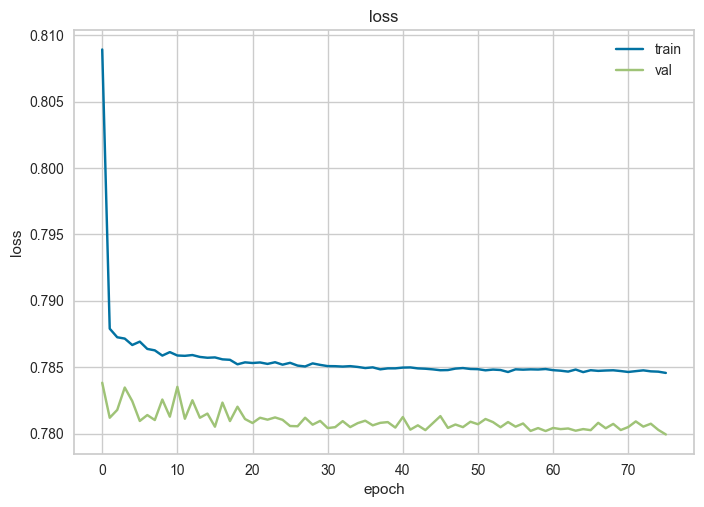

In [187]:
# summarize history for accuracy
plt.plot(history_geo2.history['loss'])
plt.plot(history_geo2.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [191]:

model_geo2.get_layer('geo_level_2_id_Embedding').get_weights()[0]
# Below are the learned embedding for each unique category in the columns
model_geo2.get_layer('geo_level_2_id_Embedding').get_weights()[0].shape
# (embedding size)

(1393, 20)

In [207]:
model_geo2.get_layer('geo_level_2_id_Embedding').get_weights()[0]

array([[-0.01056756, -0.05058794,  0.0117951 , ..., -0.25869253,
        -0.08047352,  0.00474135],
       [-0.20351285, -0.00060892, -0.06004881, ..., -0.1253082 ,
         0.10005204, -0.0462734 ],
       [-0.03965588,  0.06285448, -0.09307991, ..., -0.01335135,
         0.12794043,  0.12299501],
       ...,
       [-0.0336004 , -0.03458999,  0.02858286, ...,  0.03379126,
        -0.03049527,  0.0432618 ],
       [ 0.0439871 , -0.0099617 ,  0.01823768, ..., -0.04456652,
        -0.04643151, -0.0188449 ],
       [-0.02143842,  0.00783762,  0.0439782 , ...,  0.00378316,
        -0.00966967,  0.00509902]], dtype=float32)

In [ ]:
# Extract embedding based on the label encoding
geo2_embeddings = {idx2:model_geo2.get_layer('geo_level_2_id_Embedding').get_weights()[0][idx2] 
                    for w2, idx2 in le_dict_geo2['geo_level_2_id'].items()}

In [ ]:
geo1_embeddings_df = pd.DataFrame(geo1_embeddings)
geo1_embeddings_T = geo1_embeddings_df.T.reset_index()
geo1_embeddings_T

### Geo Level 3

In [213]:

column3 =['geo_level_3_id']
input_train_list4 = []
input_test_list4 = []
for x in column3:
  input_train_list4.append(X_train[c].values)
  input_test_list4.append(X_test[c].values)
  
print(np.unique(input_train_list4))
print(np.unique(input_test_list4))

[   0    1    2 ... 1411 1412 1413]
[   0    1    2 ... 1411 1412 1413]


In [216]:

# input models will capture all the input list
input_models_geo3=[]

# output embeddings will capture all the output embeddings
output_embeddings_geo3=[]

for c in column3:
  cat_emb_name3= c+'_Embedding'
  #Identifying the number of unique values in the category
  no_of_unique_cat3  = X_train[c].nunique()
  print(X_train[c].unique())
  embedding_size3 = 20
  input_model3 = Input(shape=(1,),name = x+'_Input')
  output_model3 = Embedding(no_of_unique_cat3, embedding_size3,name=cat_emb_name3)(input_model3)
  output_model3 = Reshape(target_shape=(embedding_size3,))(output_model3)   

  input_models_geo3.append(input_model3)
  output_embeddings_geo3.append(output_model3) 

output3 = Concatenate()(output_embeddings_geo3)
output3 = Dense(128)(output3)
output3 = Activation('relu')(output3)
#output= Dropout(0.2)(output)
output3 = Dense(256)(output3)
output3 = Activation('relu')(output3)
#output= Dropout(0.3)(output)
output3 = Dense(4, activation='softmax')(output3)

model_geo3 = Model(inputs=input_models_geo3, outputs=output3)
model_geo3.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=['sparse_categorical_accuracy'])

model_geo3.summary()

[ 7928  8511  4746 ...  8044  4083 10429]
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 geo_level_3_id_Input (Input  [(None, 1)]              0         
 Layer)                                                          
                                                                 
 geo_level_3_id_Embedding (E  (None, 1, 20)            214880    
 mbedding)                                                       
                                                                 
 reshape_4 (Reshape)         (None, 20)                0         
                                                                 
 concatenate_4 (Concatenate)  (None, 20)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               2688      
                                                                 
 activation_8 (Ac

In [215]:
history_geo3  =  model_geo3.fit(input_train_list4, y_train, validation_split=.2 , epochs =  76 , batch_size = 128)

Epoch 1/76


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


InvalidArgumentError: Graph execution error:

Detected at node 'model_3/geo_level_2_id_Embedding/embedding_lookup' defined at (most recent call last):
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/traitlets/config/application.py", line 978, in launch_instance
      app.start()
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/lk/55jnxxf95rqfv_vym43yzm9h0000gn/T/ipykernel_4201/748659606.py", line 1, in <module>
      history_geo3  =  model_geo3.fit(input_train_list4, y_train, validation_split=.2 , epochs =  76 , batch_size = 128)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1023, in train_step
      y_pred = self(x, training=True)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/layers/core/embedding.py", line 208, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'model_3/geo_level_2_id_Embedding/embedding_lookup'
indices[79,0] = 1411 is not in [0, 1393)
	 [[{{node model_3/geo_level_2_id_Embedding/embedding_lookup}}]] [Op:__inference_train_function_619591]

In [ ]:
geo2_embeddings_T = geo1_embeddings_T.rename(columns={0: 'g1_1', 1:'g1_2', 2:'g1_3',3 :'g1_4', 4:'g1_5', 5:'g1_6', 6: 'g1_7',
                                                     7:'g1_8',8:'g1_9',9:'g1_10', 10:'g1_11', 11:'g1_12', 12:'g1_13', 13:'g1_14',
                                                     14:'g1_15', 15:'g1_16'})
geo2_embeddings_T

In [ ]:



#Para Train
X_train_CE = pd.merge(df_train_CE, geo1_embeddings_T, how = 'inner', left_on='geo_level_1_id', right_on='index')
y_train_CE = X_train_CE['damage_grade']
X_train_emb = X_train_CE.copy().drop(['geo_level_1_id', 'index'], axis=1)

#Para Test
X_test_CE = pd.merge(df_test_CE, geo1_embeddings_T, how = 'inner', left_on='geo_level_1_id', right_on='index')
y_test_CE = X_test_CE['damage_grade']
X_test_emb = X_test_CE.copy().drop(['geo_level_1_id', 'index'], axis=1)

print(X_test_emb)
print(X_train_emb)

In [ ]:

categorical_columns = ['foundation_type']
input_train_list = []
input_test_list = []
for c in categorical_columns:
  input_train_list.append(X_train[c].values)
  input_test_list.append(X_test[c].values)

In [ ]:
input_train_list

[array([2, 2, 2, ..., 2, 2, 1])]

In [ ]:
# input models will capture all the input list
input_models=[]

# output embeddings will capture all the output embeddings
output_embeddings=[]

for c in categoricas:
  cat_emb_name= c+'_Embedding'
  #Identifying the number of unique values in the category
  no_of_unique_cat  = X_train[c].nunique()
  print(X_train[c].unique())
  embedding_size = no_of_unique_cat // 2 + 1
  input_model = Input(shape=(1,),name = c+'_Input')
  output_model = Embedding(no_of_unique_cat, embedding_size,name=cat_emb_name)(input_model)
  output_model = Reshape(target_shape=(embedding_size,))(output_model)   

  input_models.append(input_model)
  output_embeddings.append(output_model) 

output = Concatenate()(output_embeddings)
output = Dense(128)(output)
output = Activation('relu')(output)
#output= Dropout(0.2)(output)
output = Dense(256)(output)
output = Activation('relu')(output)
#output= Dropout(0.3)(output)
output = Dense(3, activation='softmax')(output)

model = Model(inputs=input_models, outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01),metrics=['sparse_categorical_accuracy'])

[1 2 0]
[2 4 3 1 0]
[0 1 2]
[0 3 2 1 4]
[1 3 0 2]
[2 3 0 1]
[2 7 9 1 8 5 6 0 3 4]
[2 3 0 1]


In [ ]:
model.summary()

In [ ]:
y_test2 = y_test - 1
y_train2 = y_train - 1

In [ ]:
X_train[categoricas]

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
24098,1,2,0,0,1,2,2,2
52439,2,2,1,0,1,2,2,2
31966,2,2,1,0,1,2,2,2
14001,2,2,1,3,1,2,2,2
127940,2,2,0,3,1,2,2,2
...,...,...,...,...,...,...,...,...
97639,2,2,1,0,1,3,2,2
95939,2,2,0,0,1,2,2,2
152315,2,2,1,3,1,2,2,2
117952,2,2,0,0,1,2,2,2


In [ ]:
input_train_list = X_train[categoricas].values
input_test_list = X_test[categoricas].values

In [ ]:
input_train_list.shape

(125088, 8)

In [ ]:
history  =  model.fit(input_train_list.reshape(8, -1), y_train2.values, validation_split=.2 , epochs =  100 , batch_size = 128, verbose= 2)

In [ ]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:

model.get_layer('foundation_type_Embedding').get_weights()[0]
# Below are the learned embedding for each unique category in the workclass columns
model.get_layer('foundation_type_Embedding').get_weights()[0].shape
# The shape is (7,10) meaning 7 unique values each described by 10 values 
# (embedding size)

(5, 2)

In [ ]:
model.get_layer('foundation_type_Embedding').get_weights()[0]

array([[-15.434419, -15.516176],
       [-28.092117, -28.035252],
       [-47.661552, -47.62008 ],
       [-35.29456 , -35.28911 ],
       [-35.511425, -35.51071 ]], dtype=float32)

In [ ]:
le_dict['foundation_type'].items()

dict_items([('h', 0), ('i', 1), ('r', 2), ('u', 3), ('w', 4)])

In [ ]:
# Need to extract embedding based on the label encoding
found_type_embeddings = {idx:model.get_layer('foundation_type_Embedding').get_weights()[0][idx] for w, idx in le_dict['foundation_type'].items()}

     

In [ ]:
ftype_embeddings_df = pd.DataFrame(found_type_embeddings)
ftype_embeddings_df

,0,1,2,3,4
0,-15.434419,-28.092117,-47.661552,-35.294559,-35.511425
1,-15.516176,-28.035252,-47.620079,-35.289108,-35.510712


In [ ]:
ftype_embeddings_df = ftype_embeddings_df.T.reset_index()
ftype_embeddings_df


,index,0,1
0,0,-15.434419,-15.516176
1,1,-28.092117,-28.035252
2,2,-47.661552,-47.620079
3,3,-35.294559,-35.289108
4,4,-35.511425,-35.510712


In [ ]:
ftype_embeddings_df = ftype_embeddings_df.rename(columns={0: 'ftype1', 1:'ftype2'})
ftype_embeddings_df

,index,ftype1,ftype2
0,0,-15.434419,-15.516176
1,1,-28.092117,-28.035252
2,2,-47.661552,-47.620079
3,3,-35.294559,-35.289108
4,4,-35.511425,-35.510712


In [ ]:
# Dataset used for training XGB model
df_train_CE = pd.concat([X_train, y_train], axis = 1)
# Dataset used for testing XGB model
df_test_CE = pd.concat([X_test, y_test], axis = 1)

In [ ]:
X_train_CE = pd.merge(df_train_CE, ftype_embeddings_df, how = 'inner', left_on='foundation_type', right_on='index')
#y_train = X_train_CE['target']

In [ ]:
X_train_CE

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,index,ftype1,ftype2
0,0,1405,8581,2,25,10,6,1,2,0,...,0,0,0,0,0,0,3,2,-47.661552,-47.620079
1,4,1334,9215,3,0,11,9,2,2,1,...,0,0,0,0,0,0,2,2,-47.661552,-47.620079
2,10,405,5132,3,15,6,7,2,2,1,...,0,0,0,0,0,0,2,2,-47.661552,-47.620079
3,13,526,10321,2,15,10,4,2,2,1,...,0,0,0,0,0,0,2,2,-47.661552,-47.620079
4,25,889,11109,2,25,8,4,2,2,0,...,0,0,0,0,0,0,2,2,-47.661552,-47.620079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125083,18,371,11761,1,0,3,3,2,0,0,...,0,0,0,0,0,0,3,0,-15.434419,-15.516176
125084,15,192,8500,3,80,13,7,0,0,0,...,0,0,0,0,0,0,2,0,-15.434419,-15.516176
125085,17,247,870,2,35,18,4,2,0,0,...,0,0,0,0,0,0,3,0,-15.434419,-15.516176
125086,9,1298,3756,1,10,8,3,2,0,0,...,0,0,0,0,0,0,2,0,-15.434419,-15.516176


In [ ]:
X_train_em = X_train_CE.copy().drop(['foundation_type', 'index'], axis=1)
X_train_em

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,roof_type,ground_floor_type,...,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,ftype1,ftype2
0,0,1405,8581,2,25,10,6,1,0,0,...,0,0,0,0,0,0,0,3,-47.661552,-47.620079
1,4,1334,9215,3,0,11,9,2,1,0,...,0,0,0,0,0,0,0,2,-47.661552,-47.620079
2,10,405,5132,3,15,6,7,2,1,0,...,0,0,0,0,0,0,0,2,-47.661552,-47.620079
3,13,526,10321,2,15,10,4,2,1,3,...,0,0,0,0,0,0,0,2,-47.661552,-47.620079
4,25,889,11109,2,25,8,4,2,0,3,...,0,0,0,0,0,0,0,2,-47.661552,-47.620079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125083,18,371,11761,1,0,3,3,2,0,0,...,0,0,0,0,0,0,0,3,-15.434419,-15.516176
125084,15,192,8500,3,80,13,7,0,0,0,...,0,0,0,0,0,0,0,2,-15.434419,-15.516176
125085,17,247,870,2,35,18,4,2,0,0,...,0,0,0,0,0,0,0,3,-15.434419,-15.516176
125086,9,1298,3756,1,10,8,3,2,0,0,...,0,0,0,0,0,0,0,2,-15.434419,-15.516176


In [ ]:
categoricas

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [ ]:
X_test['land_surface_condition'].unique()

array([0, 2, 1])

In [ ]:
categorical_columns2 = ['land_surface_condition']
input_train_list2 = []
input_test_list2 = []
for c in categorical_columns2:
  input_train_list2.append(X_train[c].values)
  input_test_list2.append(X_test[c].values)

In [ ]:
input_test_list2

[array([0, 2, 2, ..., 2, 2, 2])]

In [ ]:

input_models2=[]
output_embeddings2=[]


for c in categorical_columns2:
  cat_emb_name2= c+'_Embedding'

  #Identifying the number of unique values in the category
  no_of_unique_cat2 = X_train[c].nunique()
  embedding_size2 = 2
  input_model2 = Input(shape=(1,),name = c+'_Input')
  output_model2 = Embedding(no_of_unique_cat2, embedding_size2,name=cat_emb_name2)(input_model2)
  output_model2 = Reshape(target_shape=(embedding_size2,))(output_model2)   

  input_models2.append(input_model2)
  output_embeddings2.append(output_model2) 

output2 = Concatenate()(output_embeddings2)
output2 = Dense(50, kernel_initializer="uniform")(output_model2)
output2 = Activation('relu')(output2)
output2= Dropout(0.2)(output2)
output2 = Dense(50, kernel_initializer="uniform")(output2)
output2 = Activation('relu')(output2)
output2= Dropout(0.3)(output2)
output2 = Dense(1, activation='sigmoid')(output2)

model2 = Model(inputs=input_models2, outputs=output2)
model2.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [ ]:
history  =  model.fit(input_train_list2, y_train, validation_data=(input_test_list2, y_test) , epochs = 10 , batch_size = 32, verbose= 2)

Epoch 1/10
3909/3909 - 7s - loss: -2.8968e+10 - accuracy: 0.0969 - val_loss: -3.4051e+10 - val_accuracy: 0.0960 - 7s/epoch - 2ms/step
Epoch 2/10
3909/3909 - 5s - loss: -4.0005e+10 - accuracy: 0.0969 - val_loss: -4.6501e+10 - val_accuracy: 0.0960 - 5s/epoch - 1ms/step
Epoch 3/10
3909/3909 - 5s - loss: -5.3957e+10 - accuracy: 0.0969 - val_loss: -6.2040e+10 - val_accuracy: 0.0960 - 5s/epoch - 1ms/step
Epoch 4/10
3909/3909 - 6s - loss: -7.1205e+10 - accuracy: 0.0969 - val_loss: -8.1090e+10 - val_accuracy: 0.0960 - 6s/epoch - 2ms/step
Epoch 5/10
3909/3909 - 5s - loss: -9.2255e+10 - accuracy: 0.0969 - val_loss: -1.0416e+11 - val_accuracy: 0.0960 - 5s/epoch - 1ms/step
Epoch 6/10
3909/3909 - 6s - loss: -1.1751e+11 - accuracy: 0.0969 - val_loss: -1.3175e+11 - val_accuracy: 0.0960 - 6s/epoch - 2ms/step
Epoch 7/10
3909/3909 - 7s - loss: -1.4761e+11 - accuracy: 0.0969 - val_loss: -1.6435e+11 - val_accuracy: 0.0960 - 7s/epoch - 2ms/step
Epoch 8/10
3909/3909 - 6s - loss: -1.8303e+11 - accuracy: 0.09